### Importing necessary packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd
plt.style.use('ggplot')
from pandas.api.types import CategoricalDtype
sns.set(rc={'figure.figsize':(12,7)})

### Reading CSV file and managing nonrelevant/reordering columns:

In [3]:
df = pd.read_csv(r'rideshare_kaggle.csv')

In [4]:
# Dropping non relevant columns
df = df.drop(['timezone', 'apparentTemperature', 'long_summary', 'humidity', 'windGustTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'sunriseTime', 'sunsetTime', 'temperatureMin', 'temperatureMax', 'timestamp'], axis = 1)

In [5]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex'],
      dtype='object')

### Cleaning Data - Finding null values and deleting them:

In [6]:
df.isnull().any(axis=0)

id                   False
hour                 False
day                  False
month                False
datetime             False
source               False
destination          False
cab_type             False
product_id           False
name                 False
price                 True
distance             False
surge_multiplier     False
latitude             False
longitude            False
temperature          False
short_summary        False
precipIntensity      False
precipProbability    False
windSpeed            False
windGust             False
visibility           False
temperatureHigh      False
temperatureLow       False
cloudCover           False
uvIndex              False
dtype: bool

In [7]:
df['price'].isnull().value_counts()

False    637976
True      55095
Name: price, dtype: int64

In [8]:
# Drop all rows with null values (have sufficient data points)
df = df.dropna(axis=0, how = 'any')

In [9]:
df.index = range(0, 637976)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 637976 non-null  object 
 1   hour               637976 non-null  int64  
 2   day                637976 non-null  int64  
 3   month              637976 non-null  int64  
 4   datetime           637976 non-null  object 
 5   source             637976 non-null  object 
 6   destination        637976 non-null  object 
 7   cab_type           637976 non-null  object 
 8   product_id         637976 non-null  object 
 9   name               637976 non-null  object 
 10  price              637976 non-null  float64
 11  distance           637976 non-null  float64
 12  surge_multiplier   637976 non-null  float64
 13  latitude           637976 non-null  float64
 14  longitude          637976 non-null  float64
 15  temperature        637976 non-null  float64
 16  sh

### Column Manipulation / Creation:

In [11]:
# Converting datetime col to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
637971   2018-12-01 23:53:05
637972   2018-12-01 23:53:05
637973   2018-12-01 23:53:05
637974   2018-12-01 23:53:05
637975   2018-12-01 23:53:05
Name: datetime, Length: 637976, dtype: datetime64[ns]

In [169]:
# Creating a new column - weekday
df['weekday'] = df['datetime'].apply(lambda x: x.day_name())

In [13]:
# Creating new column 'time of day' from hour column outlining the various times of day
df['time of day'] = df['hour'].apply(lambda row: 'Morning' if row >= 5 and row <9 else 'Mid Morning' if row >= 9 and row <13 else 'Afternoon' if row >= 13 and row <17 else 'Evening' if row >=17 and row <21 else 'Night' if (row >=21 and row<=23) or (row >=0 and row<=1) else "Late Night")

In [14]:
# Creating new column - price per distance ($/mile)
df['price_per'] = df['price']/df['distance']

In [15]:
# Creating a new column - date
df['date'] = df['datetime'].apply(lambda x: x.date())

0         2018-12-16
1         2018-11-27
2         2018-11-28
3         2018-11-30
4         2018-11-29
             ...    
637971    2018-12-01
637972    2018-12-01
637973    2018-12-01
637974    2018-12-01
637975    2018-12-01
Name: date, Length: 637976, dtype: object

In [16]:
# Surge multiplier considered - Price/Surge multiplier
df['price_surge_adjusted'] = df['price']/df['surge_multiplier']

In [17]:
# Surge multiplier considered - Price_per/Surge multiplier
df['price_per_surge_adjusted'] = df['price_per']/df['surge_multiplier']

In [19]:
# Reordering columns
df = df[['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday', 'time of day', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'price_surge_adjusted', 'distance',
       'price_per', 'price_per_surge_adjusted', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'cloudCover', 'uvIndex']]

In [20]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [21]:
# Initializing Uber only data table
df_uber = df[df['cab_type']=='Uber']

In [ ]:
df_uber.columns

In [23]:
# Initializing Lyft only data table
df_lyft = df[df['cab_type']=='Lyft']

In [24]:
df_lyft.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

#### DataFrame logistics:

In [26]:
# Highlights the time span of all the data points collected (~23 days)
fst = df['datetime'].min()
lst = df['datetime'].max()
print(fst)
print(lst)
lst-fst

2018-11-26 03:40:46
2018-12-18 19:15:10


Timedelta('22 days 15:34:24')

In [168]:
# Total ride distance range
df['distance'].max() - df['distance'].min()

7.840000000000001

In [27]:
# Number of Uber vs. Lyft rides
df.groupby('cab_type').count()['id']

cab_type
Lyft    307408
Uber    330568
Name: id, dtype: int64

# Analysis Section

### Overview Analysis - Ride Distribution 

In [28]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [29]:
# Uber - groupby for ride count per day
by_date_uber = df_uber.groupby('date').count()[['id']]

# Lyft - groupby for ride count per day
by_date_lyft = df_lyft.groupby('date').count()[['id']]

In [30]:
by_date_both = pd.merge(by_date_uber, by_date_lyft, left_index=True, right_index=True)
by_date_both.columns = ['Uber', 'Lyft']

<AxesSubplot:xlabel='Date', ylabel='Numder of Rides'>

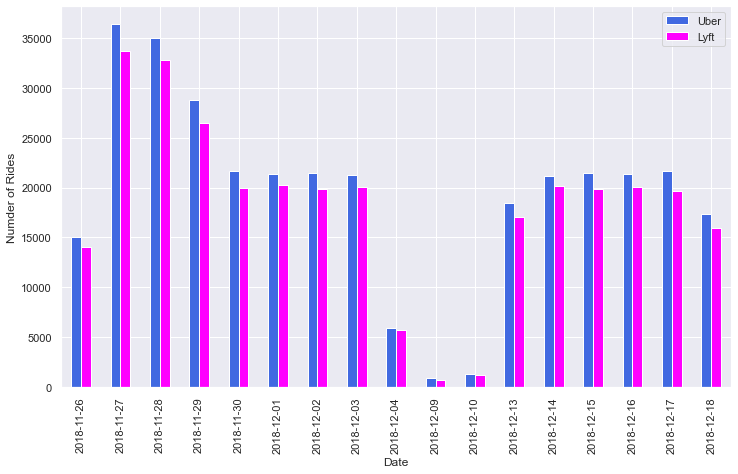

In [31]:
# Number of rides per day over the course of the ~23 day period
by_date_both.plot(kind='bar', color=['royalblue', 'magenta'], xlabel = 'Date', ylabel='Numder of Rides')


### Price Analysis

/Users/benburkey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


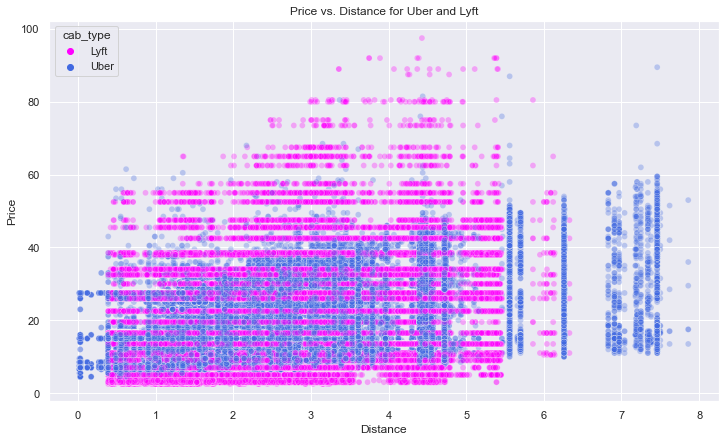

In [33]:
# General plot of price vs. distance w/ a hue for cab_type
time_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
sns.scatterplot(df['distance'], df['price'], hue=df['cab_type'], alpha=0.3, palette = ['magenta', 'royalblue'])
plt.xlabel("Distance")
plt.ylabel("Price")
plt.title("Price vs. Distance for Uber and Lyft")

plt.savefig('price_vs_distance.png', dpi=300, bbox_inches='tight')

### Distance

In [34]:
# Mean does not tell the whole story
df.groupby(['cab_type']).agg({'distance': ['mean', 'median', 'std']})

distance                 
              mean median       std
cab_type                           
Lyft      2.186976   2.14  1.086622
Uber      2.191386   2.17  1.178973

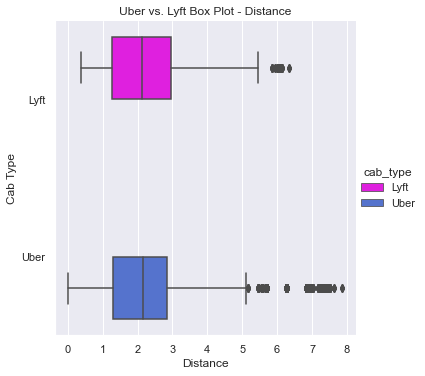

In [170]:
# Box plot highlighting overall variance in the distance of rides for Uber and Lyft
sns.catplot(x='distance', y="cab_type", kind="box", data=df, hue='cab_type', palette = ['magenta', 'royalblue'], orient='h')
plt.xlabel("Distance")
plt.ylabel("Cab Type")
plt.title("Uber vs. Lyft Box Plot - Distance")

plt.savefig('distance_box.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Uber vs. Lyft Density Plot - Distance')

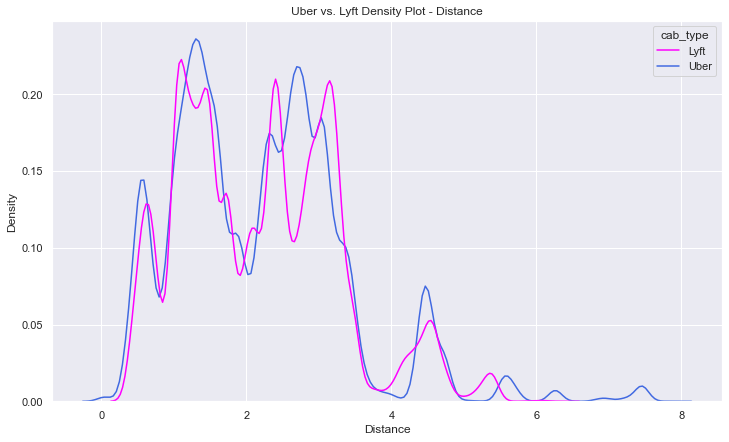

In [171]:
# KDE for Distance - very non-normal (not very useful)
sns.kdeplot(data=df, x='distance', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Distance")
plt.title("Uber vs. Lyft Density Plot - Distance")

### Price

In [37]:
# Difference in pricing more apparent in mean calculation
df.groupby(['cab_type']).agg({'price': ['mean', 'median', 'std']})

price                  
               mean median        std
cab_type                             
Lyft      17.351396   16.5  10.019171
Uber      15.795343   12.5   8.560300

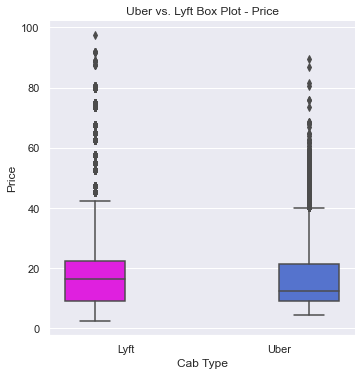

In [107]:
# Box plot highlighting overall variance in the price of rides for Uber and Lyft
sns.catplot(x='cab_type', y="price", kind="box", data=df, hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Cab Type")
plt.ylabel("Price")
plt.title("Uber vs. Lyft Box Plot - Price")

plt.savefig('price_box.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Uber vs. Lyft Density Plot - Price')

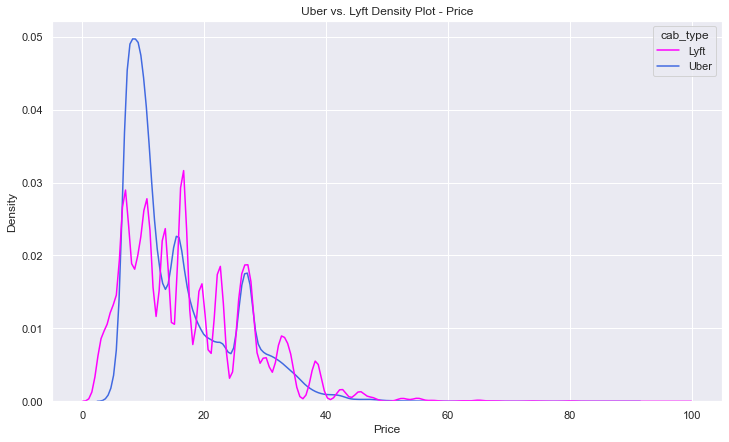

In [172]:
# Same as KDE plot for distance - experimenting with plotting and the information that can be gathered from other charts
sns.kdeplot(data=df, x='price', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Price")
plt.title("Uber vs. Lyft Density Plot - Price")

## Analysis of time/date vs. PPD (Price per Distance):

In [40]:
# Created sub dataframe w/ day number to be able to sort for seaborn line plots
df_weekday = df[['datetime', 'weekday', 'price_per', 'cab_type', 'price_per_surge_adjusted']]
df_weekday['day_number'] = df_weekday['datetime'].apply(lambda x: x.weekday())
df_weekday_sort = df_weekday.sort_values(by='day_number')

<ipython-input-40-5b7178144446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday['day_number'] = df_weekday['datetime'].apply(lambda x: x.weekday())


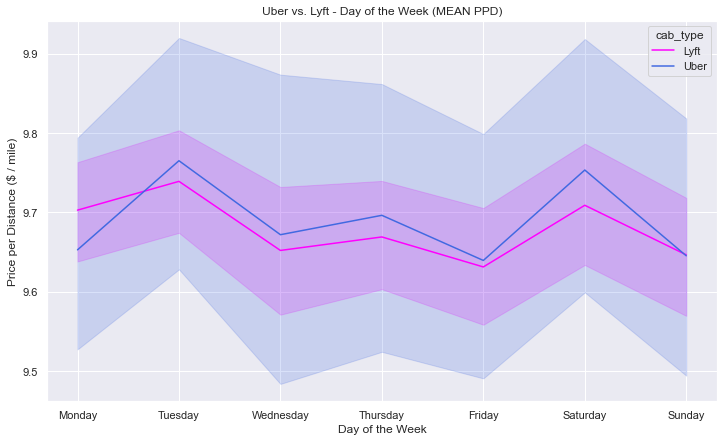

In [108]:
# Mean price per distance for Uber and Lyft for each day of the week
sns.lineplot(data=df_weekday_sort, x='weekday', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Day of the Week")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Day of the Week (MEAN PPD)")

plt.savefig('PPD_week_line.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Uber vs. Lyft - Day of the Week (MEDIAN PPD)')

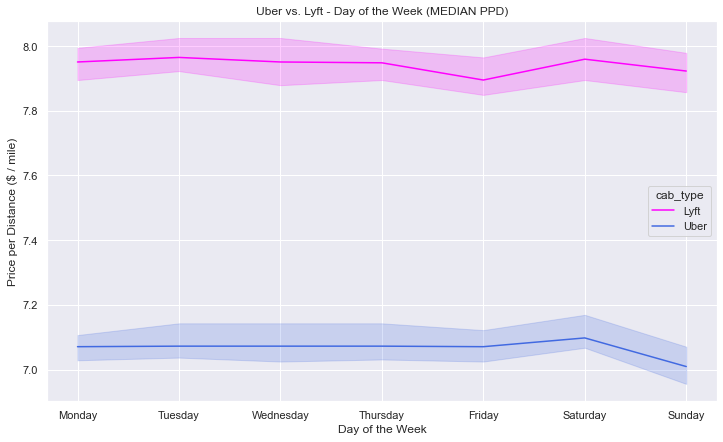

In [42]:
# Checking weekday vs. price per distance using MEDIAN estimator
sns.lineplot(data=df_weekday_sort, x='weekday', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'], estimator=np.median)
plt.xlabel("Day of the Week")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Day of the Week (MEDIAN PPD)")

In [43]:
# Total count of rides per hour, avg. surge multiplier each hour, avg. distance per hour, avg. price per distance per hour
time_of_day = df.groupby(['hour']).agg({'id':'size', 'surge_multiplier':'mean', 'distance':'mean', 'price_per':'mean'})
time_of_day

,id,surge_multiplier,distance,price_per
hour,,,,
0,29872,1.015449,2.186149,9.726170
1,26310,1.015317,2.180502,9.663340
2,26323,1.015652,2.192988,9.688609
3,25530,1.014835,2.188440,9.635379
4,26125,1.014526,2.178671,9.628231
5,22995,1.014873,2.179677,9.889194
6,25147,1.014515,2.189237,9.810561
7,22930,1.013945,2.174980,9.550098
8,22337,1.014908,2.199121,9.699164


In [44]:
# Created sub dataframe w/ ordered times of day to be able to sort for seaborn line plots
order_dict = {'Morning':0, 'Mid Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late Night':5}
df_time_of_day = df[['time of day', 'price_per', 'cab_type']]
df_time_of_day_sort = df_time_of_day.sort_values(by='time of day', key=lambda x: x.map(order_dict))

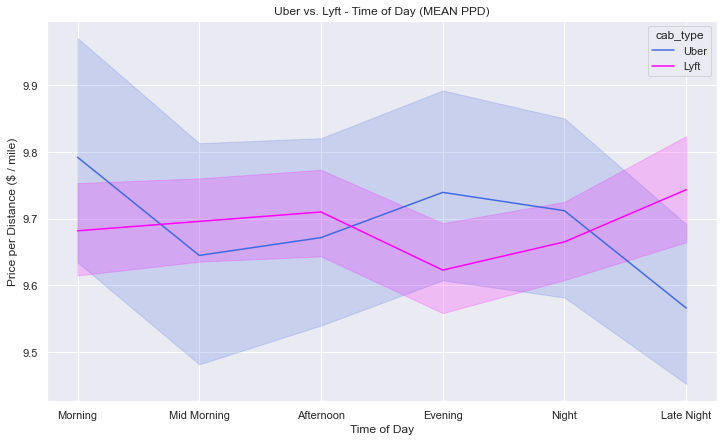

In [112]:
# Plot of Time of Day vs. Price per Distance
sns.lineplot(data=df_time_of_day_sort, x='time of day', y='price_per', hue='cab_type', palette = ['royalblue', 'magenta'])
plt.xlabel("Time of Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Time of Day (MEAN PPD)")

plt.savefig('PPD_time_of_day.png', dpi=300, bbox_inches='tight')

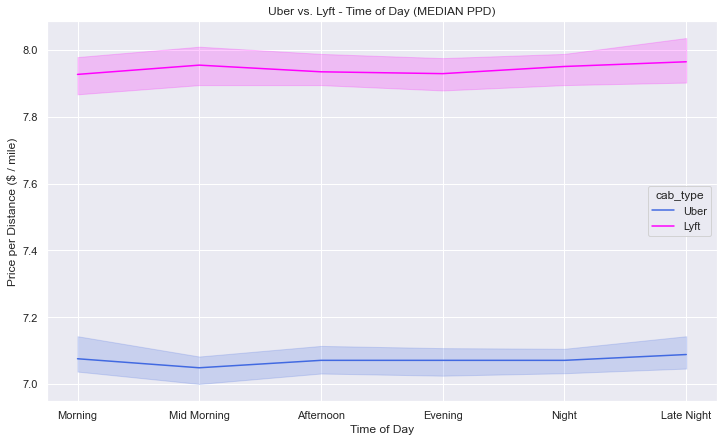

In [109]:
# Checking time of day vs. price per distance using MEDIAN estimator
sns.lineplot(data=df_time_of_day_sort, x='time of day', y='price_per', hue='cab_type', palette = ['royalblue', 'magenta'], estimator=np.median)
plt.xlabel("Time of Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Time of Day (MEDIAN PPD)")

In [47]:
df.groupby(['cab_type', 'time of day']).agg({'price_per':['mean', 'median', 'std','min', 'max']})

price_per                                            
                          mean    median        std       min          max
cab_type time of day                                                      
Lyft     Afternoon    9.710173  7.934600   7.645609  0.556586   109.375000
         Evening      9.623090  7.929104   7.428408  0.556586   108.333333
         Late Night   9.743585  7.964602   7.691428  0.635593   114.130435
         Mid Morning  9.696064  7.954545   7.626943  0.649351    94.827586
         Morning      9.681960  7.926829   7.585001  0.642398    98.913043
         Night        9.665381  7.950530   7.515565  0.634249   114.130435
Uber     Afternoon    9.671725  7.070707  16.393437  1.474531  1375.000000
         Evening      9.739554  7.070707  17.752696  1.474531  1375.000000
         Late Night   9.566126  7.088123  12.137822  1.498638   687.500000
         Mid Morning  9.645065  7.048458  19.538836  1.474531  1375.000000
         Morning      9.792259  7.075472  19.437468  1.541555  1375.000000
         Night        9.712099  7.070707  18.025592  1.474531  1375.000000

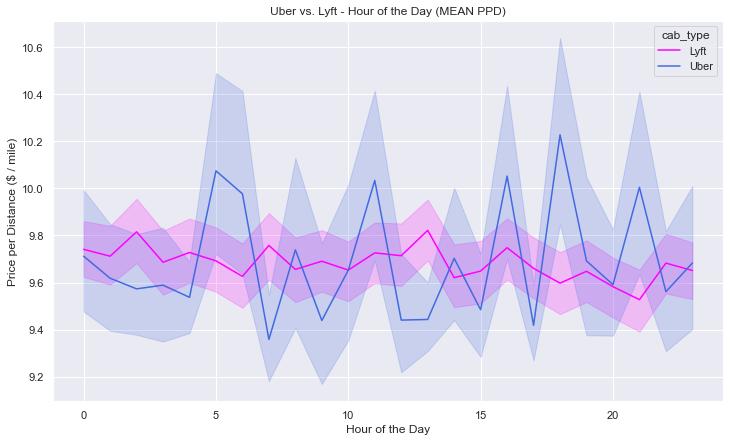

In [111]:
# Plot of specific Hours of the Day vs. Price per Distance
sns.lineplot(data=df, x='hour', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Hour of the Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Hour of the Day (MEAN PPD)")

plt.savefig('PPD_hour.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Uber vs. Lyft - Hour of the Day (MEDIAN PPD)')

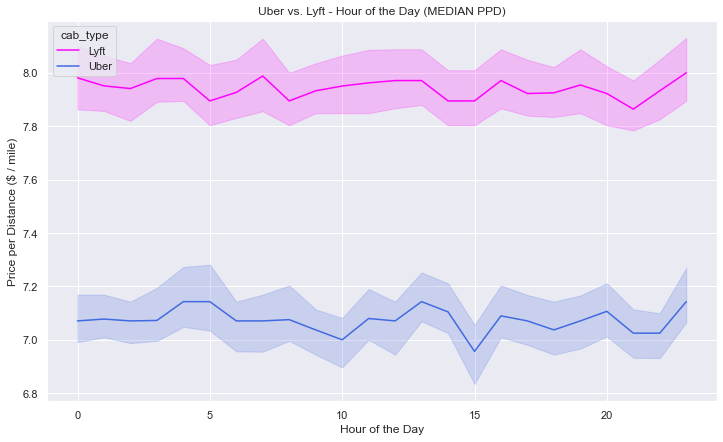

In [173]:
# Checking hour of the day vs. price per distance using MEDIAN estimator
sns.lineplot(data=df, x='hour', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'], estimator=np.median)
plt.xlabel("Hour of the Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Hour of the Day (MEDIAN PPD)")

## Analysis of pick-up /drop-off locations:

In [50]:
loc_source_dest_count = df_lyft.groupby(['source', 'destination']).count()[['id']]
loc_source_dest_count

id
source   destination                  
Back Bay Boston University        4164
         Fenway                   4212
         Haymarket Square         4236
         North End                4548
         Northeastern University  4271
...                                ...
West End Fenway                   4530
         Haymarket Square         4032
         North End                4110
         Northeastern University  4224
         South Station            4200

[72 rows x 1 columns]

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Back Bay')

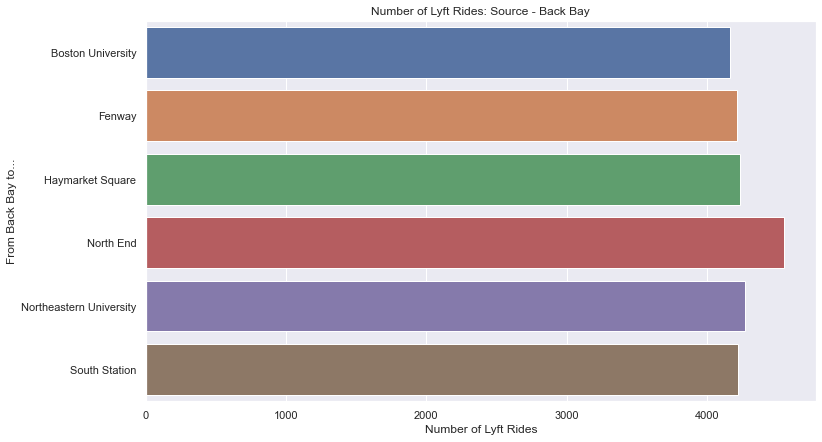

In [51]:
# Amount of LYFT rides originating from Back Bay
back_bay_count = sns.barplot(x='id', y=loc_source_dest_count.loc[('Back Bay')].index, data=loc_source_dest_count.loc[('Back Bay')])
back_bay_count.set_xlabel('Number of Lyft Rides')
back_bay_count.set_ylabel('From Back Bay to...')
back_bay_count.set_title('Number of Lyft Rides: Source - Back Bay')


Text(0.5, 1.0, 'Number of Lyft Rides: Source - Beacon Hill')

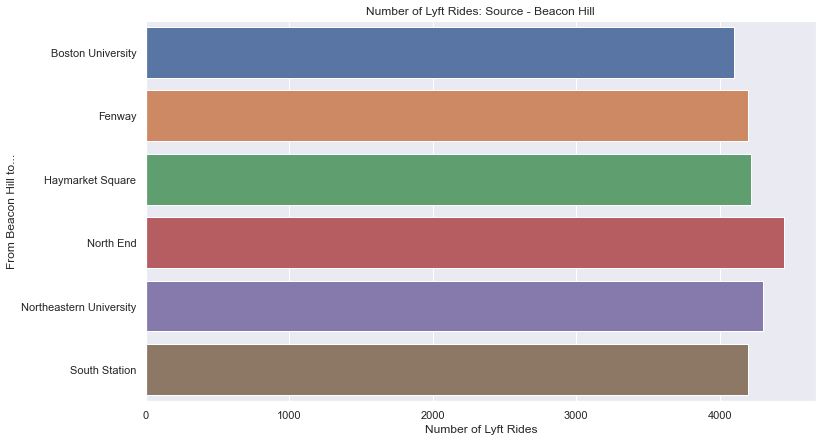

In [52]:
# Amount of LYFT rides originating from Beacon Hill
beacon_hill_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Beacon Hill')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Beacon Hill')])
beacon_hill_count.set_xlabel('Number of Lyft Rides')
beacon_hill_count.set_ylabel('From Beacon Hill to...')
beacon_hill_count.set_title('Number of Lyft Rides: Source - Beacon Hill')

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Boston University')

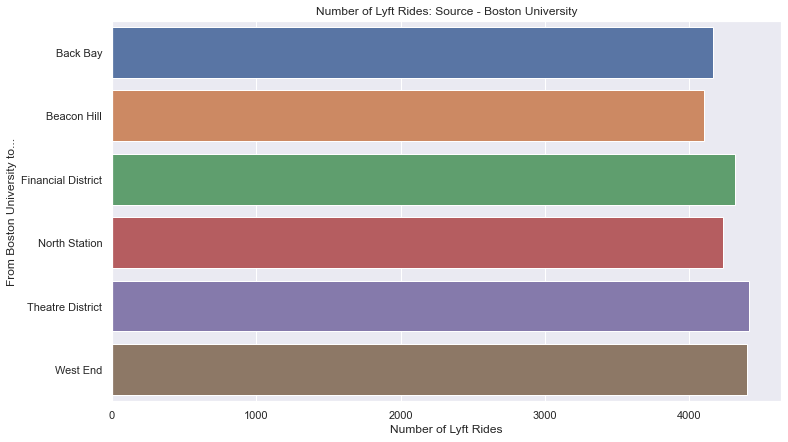

In [53]:
# Amount of LYFT rides originating from Boston University
boston_university_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Boston University')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Boston University')])
boston_university_count.set_xlabel('Number of Lyft Rides')
boston_university_count.set_ylabel('From Boston University to...')
boston_university_count.set_title('Number of Lyft Rides: Source - Boston University')

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Fenway')

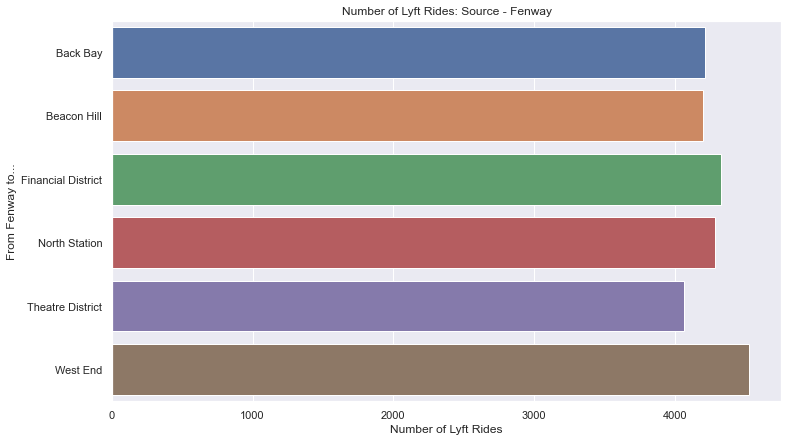

In [54]:
# Amount of LYFT rides originating from Fenway
fenway_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Fenway')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Fenway')])
fenway_count.set_xlabel('Number of Lyft Rides')
fenway_count.set_ylabel('From Fenway to...')
fenway_count.set_title('Number of Lyft Rides: Source - Fenway')

##### ETC.... (would continue to plot the count of all 12 separate source/pick-up locations and their corresponding destination/drop-off locations but the distributions aren't drastic enough)

### Correcting False Latitude/Longitude Coordinates & Reading GeoJSON File
#### Longitude and latitude metrics originally provided for each source and destination were mainly inaccurate. As a solution, I (1) took the names of the neighborhoods provided as valid, (2) found correct longitude and latitude coordinates for each of those neighborhoods, and (3) mapped those coordinates of the original neighborhoods to existing neighborhoods in GeoJSON file.

In [55]:
import json
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [174]:
# Finding accurate latitude and longitude coordinates for source/destination neighborhoods originally provided

LOCATOR = RateLimiter(Nominatim(user_agent='myGeoCoder').geocode, min_delay_seconds=1.5)

def get_lat_long(location):
    loc = LOCATOR(location)
    return loc.latitude, loc.longitude

def get_neighborhoods(filename='rideshare_kaggle.csv'):
    data = pd.read_csv(filename)
    neighborhoods = set(np.concatenate([data['source'].unique(), data['destination'].unique()]))
    return pd.DataFrame([
        (nb, *get_lat_long(f'{nb}, Boston, MA')) for nb in neighborhoods
    ], columns=['Neighborhood', 'Latitude', 'Longitude'])

neighborhoods = get_neighborhoods('rideshare_kaggle.csv')

In [57]:
# Reading geojson file
def load_geo_json(filename='Boston_Neighborhoods.geojson'):
    with open(filename, 'r') as f:
        boston_geo_json = json.loads(f.read())
    return boston_geo_json

In [175]:
# Initializing Boston_Neighborhoods.geojson to boston_geo_json variable 
boston_geo_json = load_geo_json('Boston_Neighborhoods.geojson')

In [59]:
# Creating polygons constituted by latitude and longitude lines from geo_json file - Boston_Neighborhoods
def create_polygon(shape):
    array = np.array(shape)
    if len(array.shape) == 2:
        return Polygon(shape)
    return Polygon(shape[0])

def create_polygons(neighborhood):
    coords = neighborhood['geometry']['coordinates']
    
    return [create_polygon(shape) for shape in coords]

neighborhood_polygons = {
    neighborhood['properties']['Name']: create_polygons(neighborhood) 
    for neighborhood in boston_geo_json['features']
}

# Regrouping source and destination neighborhood assignment based off new lat/long coordinates
def which_neighborhoods(row):
    point = Point(row['Longitude'], row['Latitude'],)
    for neighborhood, polygons in neighborhood_polygons.items():
        for polygon in polygons:
            if point.within(polygon):
                return neighborhood

In [177]:
# Table of originally provided neighborhoods, their longitude and latitude, and the corresponding neighborhood based on GeoJSON file used
neighborhoods['geo_json_neighborhood'] = neighborhoods.apply(which_neighborhoods, axis=1)
neighborhoods

,Neighborhood,Latitude,Longitude,geo_json_neighborhood
0,Boston University,42.350317,-71.101227,Fenway
1,South Station,42.352474,-71.054974,Downtown
2,West End,42.363919,-71.063899,West End
3,Theatre District,42.356258,-71.060798,Downtown
4,Back Bay,42.350549,-71.080311,Back Bay
5,Fenway,42.345187,-71.104599,Fenway
6,North End,42.365097,-71.054495,North End
7,Haymarket Square,42.362950,-71.057845,Downtown
8,Beacon Hill,42.358708,-71.067829,Beacon Hill
9,Northeastern University,42.339030,-71.087913,Fenway


### Creating New DataFrame for Geographical Analysis

In [61]:
# Creating new df for the location analysis (new_source, new_dest and lat/long conversions)
df_geo = df.copy()

In [62]:
df_geo.drop(['latitude', 'longitude', 'temperature', 'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex'], axis=1, inplace=True)

In [63]:
# Latitude and Longitude dictionaries for mapping to sources and destinations
lat_dict = {'Financial District': 42.355838, 'South Station':42.352474, 'North End':42.365097, 'Fenway': 42.345187, 'Northeastern University':42.339030, 'West End': 42.363919, 'North Station':42.365282, 'Beacon Hill': 42.358708, 'Theatre District': 42.356258, 'Back Bay': 42.350549, 'Haymarket Square': 42.362950, 'Boston University': 42.350317}
long_dict = {'Financial District': -71.055616, 'South Station':-71.054974, 'North End':-71.054495, 'Fenway': -71.104599, 'Northeastern University':-71.087913, 'West End': -71.063899, 'North Station':-71.060150, 'Beacon Hill': -71.067829, 'Theatre District': -71.060798, 'Back Bay': -71.080311, 'Haymarket Square': -71.057845, 'Boston University': 71.101227}
loc_dict = {'North End':'North End', 'Financial District':'Downtown', 'Theatre District':'Downtown', 'Beacon Hill':'Beacon Hill', 'Northeastern University':'Fenway', 'West End':'West End', 'North Station': 'West End', 'Back Bay':'Back Bay', 'Boston University':'Fenway', 'Haymarket Square':'Downtown', 'South Station':'Downtown', 'Fenway':'Fenway'}
df_geo['updated_source'] = df_geo['source'].map(loc_dict)
df_geo['updated_dest'] = df_geo['destination'].map(loc_dict)
df_geo['source_lat'] = df_geo['source'].map(lat_dict)
df_geo['source_long'] = df_geo['source'].map(long_dict)
df_geo['dest_lat'] = df_geo['destination'].map(lat_dict)
df_geo['dest_long'] = df_geo['destination'].map(long_dict)

In [65]:
df_geo = df_geo[['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'updated_source', 'destination', 'updated_dest', 'source_lat', 'source_long', 'dest_lat',
       'dest_long', 'cab_type', 'product_id',
       'name', 'price', 'distance', 'price_per', 'price_per_surge_adjusted',
       'surge_multiplier']]

### Geographical Source/Destination Analysis

In [67]:
# New geo sub dataframes for Uber and Lyft
df_geo_uber = df_geo.loc[df_geo['cab_type']=='Uber']
df_geo_lyft = df_geo.loc[df_geo['cab_type']=='Lyft']

In [123]:
# Uber source group by
updated_source_agg_uber = df_geo_uber.groupby('updated_source').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})
# Uber destination group by
updated_dest_agg_uber = df_geo_uber.groupby('updated_dest').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})
# Lyft source group by
updated_source_agg_lyft = df_geo_lyft.groupby('updated_source').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})
# Lyft destination group by
updated_dest_agg_lyft = df_geo_lyft.groupby('updated_dest').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})

In [70]:
# Initializing shx file for choropleth mapping of source/destinations
bos_nb = 'Boston_Neighborhoods.shx'
map_df = gpd.read_file(bos_nb)

In [141]:
# Merging each groupy (uber vs. lyft, source vs. dest) with geopandas df
df_merged_source_uber = map_df.merge(updated_source_agg_uber, left_on=['Name'], right_on=updated_source_agg_uber.index)
df_merged_source_lyft = map_df.merge(updated_source_agg_lyft, left_on=['Name'], right_on=updated_source_agg_lyft.index)
df_merged_dest_uber = map_df.merge(updated_dest_agg_uber, left_on=['Name'], right_on=updated_dest_agg_uber.index)
df_merged_dest_lyft = map_df.merge(updated_dest_agg_lyft, left_on=['Name'], right_on=updated_dest_agg_lyft.index)

#### Source Choropleth Plots (Pick-up location)

Text(-71.1, 42.345, 'Fenway')

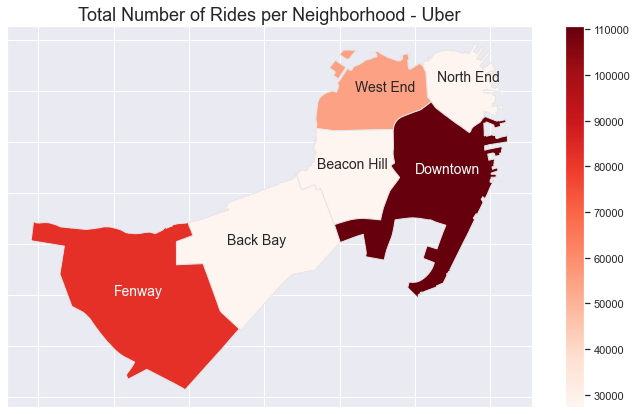

In [151]:
# Choropleth - Total number of rides for Uber per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
choro_uber = df_merged_source_uber.plot(column='id', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Total Number of Rides per Neighborhood - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

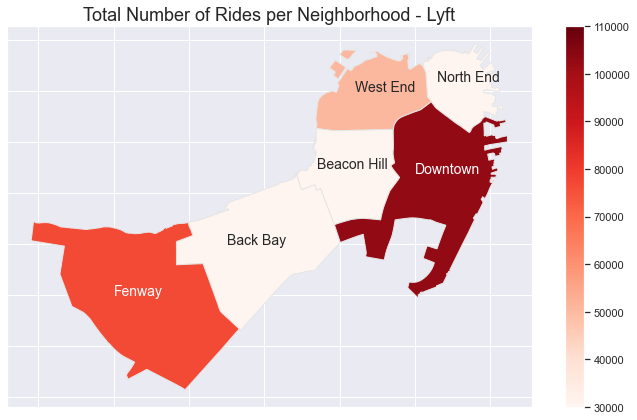

In [152]:
# Choropleth - Total number of rides for Lyft per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
choro_lyft = df_merged_source_lyft.plot(column='id', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=30000, vmax=110000)
ax.set_title('Total Number of Rides per Neighborhood - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

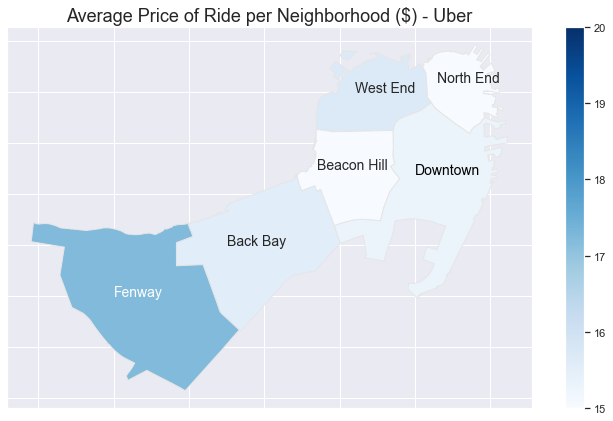

In [156]:
# Choropleth - Average price of Uber ride per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_uber.plot(column='price', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=15, vmax=20)
ax.set_title('Average Price of Ride per Neighborhood ($) - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='black', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

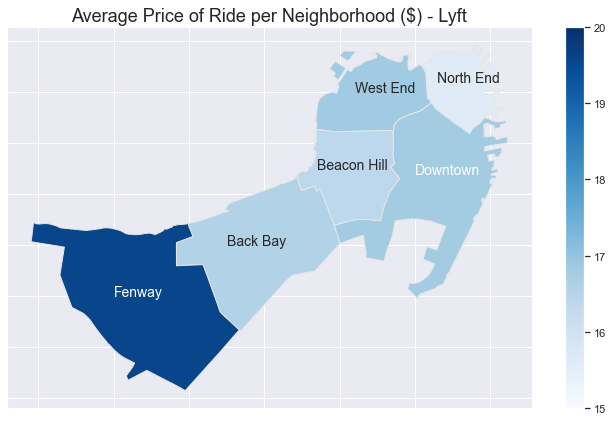

In [155]:
# Choropleth - Average price of Lyft ride per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_lyft.plot(column='price', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=15, vmax=20)
ax.set_title('Average Price of Ride per Neighborhood ($) - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

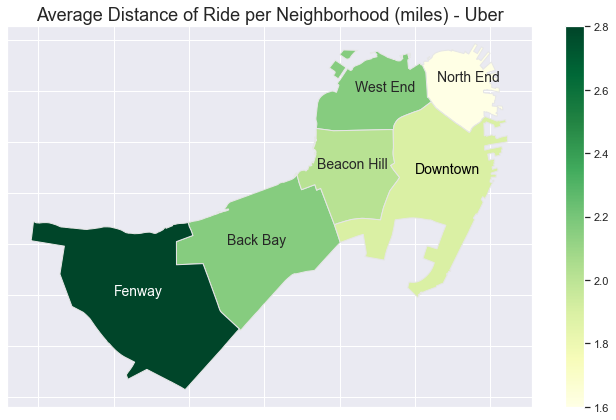

In [157]:
# Choropleth - Average distance of Uber ride per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_uber.plot(column='distance', cmap='YlGn', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=1.6, vmax=2.8)
ax.set_title('Average Distance of Ride per Neighborhood (miles) - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='black', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

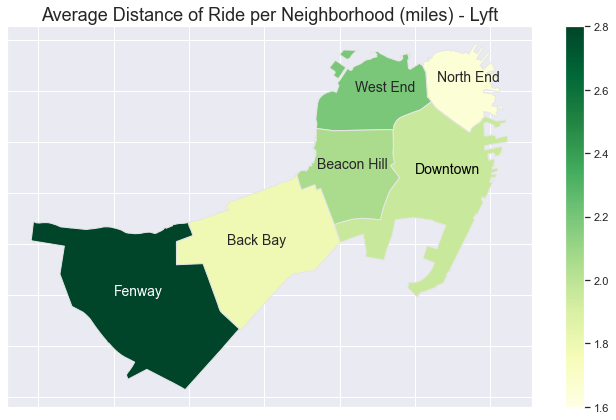

In [158]:
# Choropleth - Average distance of Lyft ride per neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_lyft.plot(column='distance', cmap='YlGn', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=1.6, vmax=2.8)
ax.set_title('Average Distance of Ride per Neighborhood (miles) - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='black', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

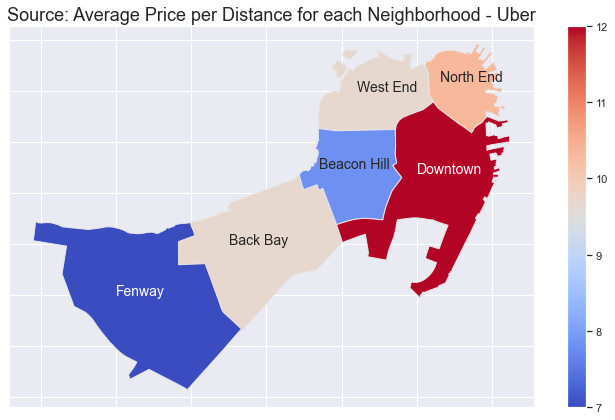

In [159]:
# Choropleth - Average Uber price per distance for each neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_uber.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Source: Average Price per Distance for each Neighborhood - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

plt.savefig('source_uber.png', dpi=300, bbox_inches='tight')

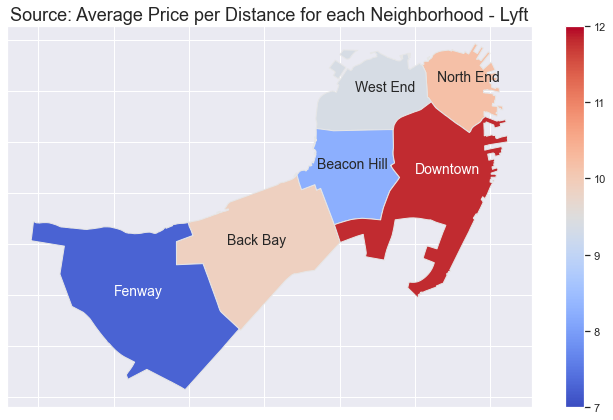

In [160]:
# Choropleth - Average Lyft price per distance for each neighborhood - Source
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_source_lyft.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Source: Average Price per Distance for each Neighborhood - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

plt.savefig('source_lyft.png', dpi=300, bbox_inches='tight')

#### Destination Choropleth Plots (Drop-off location)

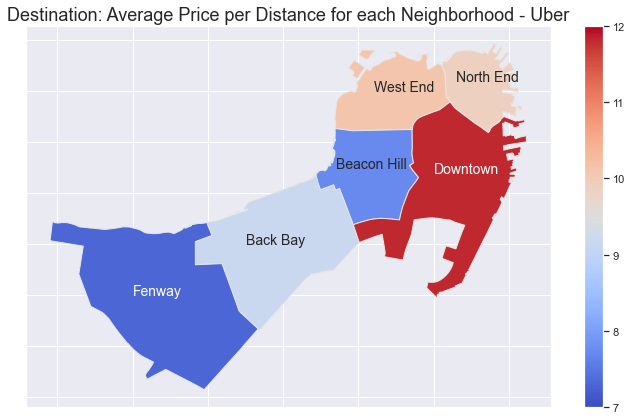

In [161]:
# Choropleth - Average Uber price per distance for each neighborhood - Destination
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_dest_uber.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Destination: Average Price per Distance for each Neighborhood - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

plt.savefig('dest_uber.png', dpi=300, bbox_inches='tight')

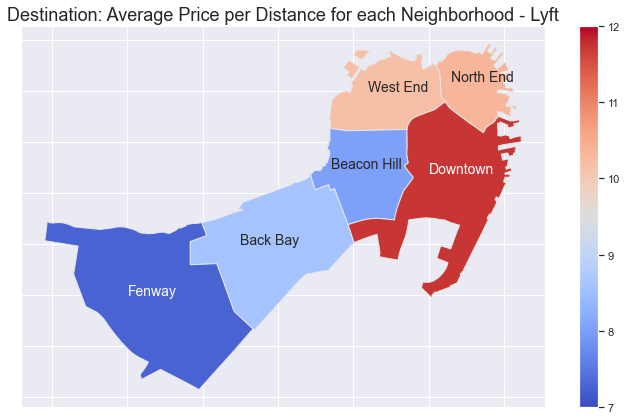

In [162]:
# Choropleth - Average Lyft price per distance for each neighborhood - Destination
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_dest_lyft.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Destination: Average Price per Distance for each Neighborhood - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Downtown', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

plt.savefig('dest_lyft.png', dpi=300, bbox_inches='tight')

#### Other geographic data groupings (not used)

In [167]:
# Groupby of cab_type - source - destination for multiple ride metrics (surge_multiplier, price, distance, price_per)
loc_source_dest_mean = df.groupby(['cab_type', 'source', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
pd.options.display.max_rows = 150

In [189]:
# Uber-source data
df_uber_source = df_geo_uber.groupby('updated_source').mean()[['price_per']].sort_values(by='updated_source')

In [190]:
# Lyft-source data
df_lyft_source = df_geo_lyft.groupby('updated_source').mean()[['price_per']].sort_values(by='updated_source')

In [191]:
# Merged source tables from both Lyft and Uber for plotting purposes
df_source_both = pd.merge(df_uber_source, df_lyft_source, on='updated_source')
df_source_both.columns = ['Uber - price per distance', 'Lyft - price per distance']

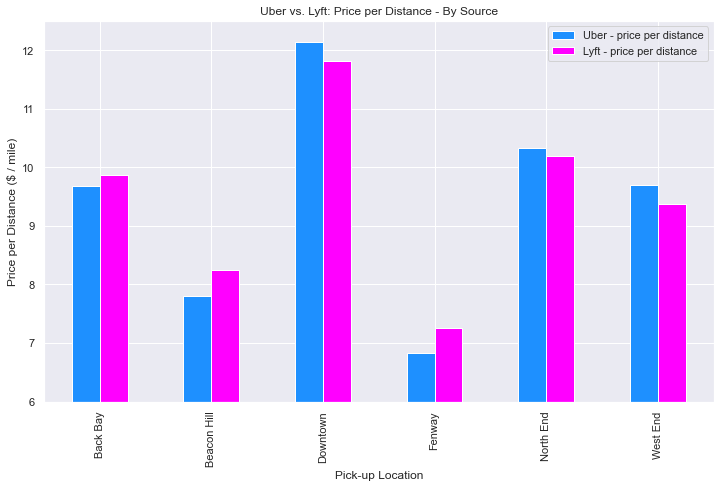

In [200]:
# Plot of Uber and Lyft prices per distance based on SOURCE (pick-up location)
df_source_both.plot(kind='bar', color=['dodgerblue', 'magenta'], title = 'Uber vs. Lyft: Price per Distance - By Source', xlabel = 'Pick-up Location', ylabel = 'Price per Distance ($ / mile)')
plt.ylim([6,12.5])

plt.savefig('source_bar.png', dpi=300, bbox_inches='tight')

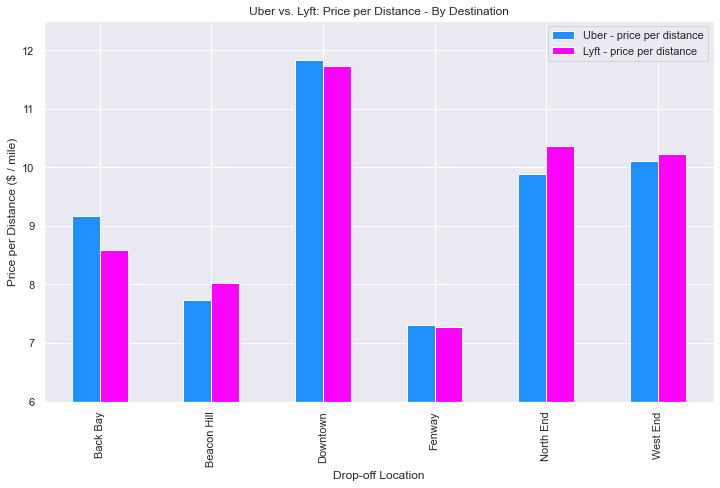

In [201]:
# Plot of Uber and Lyft prices per distance based on DESTINATION (drop-off location)
df_uber_dest = df_geo_uber.groupby('updated_dest').mean()[['price_per']].sort_values(by='updated_dest')
df_lyft_dest = df_geo_lyft.groupby('updated_dest').mean()[['price_per']].sort_values(by='updated_dest')
df_dest_both = pd.merge(df_uber_dest, df_lyft_dest, on='updated_dest')
df_dest_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_dest_both.plot(kind='bar', color=['dodgerblue', 'magenta'], title = 'Uber vs. Lyft: Price per Distance - By Destination', xlabel = 'Drop-off Location', ylabel = 'Price per Distance ($ / mile)')
plt.ylim([6,12.5])

plt.savefig('dest_bar.png', dpi=300, bbox_inches='tight')

In [184]:
df_geo_uber.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'updated_source', 'destination',
       'updated_dest', 'source_lat', 'source_long', 'dest_lat', 'dest_long',
       'cab_type', 'product_id', 'name', 'price', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier'],
      dtype='object')

In [182]:
df['temperature'].min()

18.91

In [ ]:
df.groupby(')